In [56]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
import csv

# Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association
# rules you can extract from your dataset?


csv_file_path = (r'D:\Dataset\Grocery_Items_57.csv')

# An empty list to store the data
data_list = []

# Open the CSV file and read its contents
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Add the row to the data list
        data_list.append(row)


te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)

frequent_itemsets

from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(),(whole milk),0.999750,0.15773,0.157730,0.157770,1.000250,0.000039,1.000047,1.000000
1,(whole milk),(),0.157730,0.99975,0.157730,1.000000,1.000250,0.000039,inf,0.000297
2,(pip fruit),(),0.046869,0.99975,0.046744,0.997333,0.997583,-0.000113,0.093738,-0.002536
3,(whipped/sour cream),(),0.044869,0.99975,0.044869,1.000000,1.000250,0.000011,inf,0.000262
4,(beef),(),0.032996,0.99975,0.032996,1.000000,1.000250,0.000008,inf,0.000258
...,...,...,...,...,...,...,...,...,...,...
80,(hard cheese),(),0.014248,0.99975,0.014248,1.000000,1.000250,0.000004,inf,0.000254
81,(berries),(),0.023247,0.99975,0.023247,1.000000,1.000250,0.000006,inf,0.000256
82,(specialty bar),(),0.014123,0.99975,0.013998,0.991150,0.991398,-0.000121,0.028246,-0.008724
83,(hygiene articles),(),0.013998,0.99975,0.013998,1.000000,1.000250,0.000003,inf,0.000254


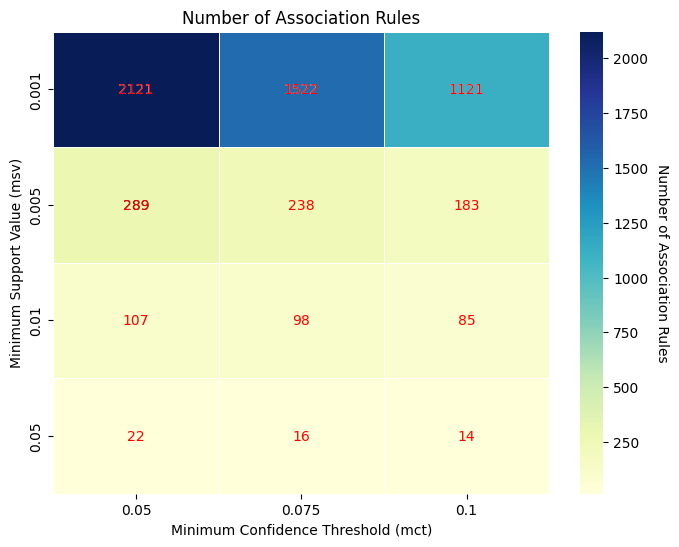

In [76]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import csv

'''
Use minimum support values (msv): 0.001, 0.005, 0.01, 0.05 and minimum confidence threshold
(mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
the dataset. Construct a heatmap using Seaborn data visualization library (https://seaborn.
pydata.org/generated/seaborn.heatmap.html) to show the count results such that the xaxis
is msv and the y-axis is mct.
'''


csv_file_path = r'D:\Dataset\Grocery_Items_57.csv'

# An empty list to store the data
data_list = []

# Open the CSV file and read its contents
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Add the row to the data list
        data_list.append(row)

# Initialize minimum support values (msv) and minimum confidence thresholds (mct)
msv_values = [0.001, 0.005, 0.01, 0.05]
mct_values = [0.05, 0.075, 0.1]

# Create a matrix to store the count of association rules for each pair (msv, mct)
count_matrix = []

# Iterate over msv values
for msv in msv_values:
    row_counts = []
    
    # Iterate over mct values
    for mct in mct_values:
        # Create transaction encoder and dataframe
        te = TransactionEncoder()
        te_ary = te.fit(data_list).transform(data_list)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        
        # Find frequent itemsets using fpgrowth
        frequent_itemsets = fpgrowth(df, min_support=msv, use_colnames=True)
        
        # Find association rules using mlxtend
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)
        
        # Count the number of association rules
        rule_count = len(rules)
        row_counts.append(rule_count)
    
    count_matrix.append(row_counts)

# Convert the count matrix to a DataFrame
count_df = pd.DataFrame(count_matrix, columns=mct_values, index=msv_values)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(count_df, annot=True, cmap="YlGnBu", cbar=True, fmt="d", linewidths=.5)

# Display the values on the heatmap
for i in range(len(msv_values)):
    for j in range(len(mct_values)):
        text = heatmap.text(j + 0.5, i + 0.5, str(count_df.iloc[i, j]),
                            ha='center', va='center', fontsize=10.1, color='red')

plt.xlabel('Minimum Confidence Threshold (mct)')
plt.ylabel('Minimum Support Value (msv)')
plt.title('Number of Association Rules')

# A separate color bar for values
cbar = heatmap.collections[0].colorbar
cbar.set_label('Number of Association Rules', rotation=270, labelpad=15)

plt.show()


In [77]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import csv

# List the association rule(s) (i.e., one or more rules depending on your dataset) that have the highest
# confidence for minimum support = 0.005. What is that confidence value?


csv_file_path = r'D:\Dataset\Grocery_Items_57.csv'

# An empty list to store the data
data_list = []

# Open the CSV file and read its contents
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Add the row to the data list
        data_list.append(row)

# Set the minimum support value
min_support = 0.005

# Create transaction encoder and dataframe
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using fpgrowth
frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)

# Find association rules using mlxtend
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)

# Sort rules by confidence in descending order
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Display the rule(s) with the highest confidence
highest_confidence_rules = rules_sorted[rules_sorted['support'] >= min_support].head(1)
print("Association Rule(s) with the Highest Confidence:")
print(highest_confidence_rules[['antecedents', 'consequents', 'confidence']])


Association Rule(s) with the Highest Confidence:
    antecedents consequents  confidence
435   (mustard)          ()         1.0


In [4]:
from PIL import Image
import os
import numpy as np

def load_images_from_folders(folders):
    images = []
    labels = []

    for class_id, folder_path in enumerate(folders):
        print(f"Processing images in folder: {folder_path}")

        for filename in os.listdir(folder_path):
            input_path = os.path.join(folder_path, filename)

            try:
                # Open the image
                img = Image.open(input_path)

                # Convert the image to grayscale
                grayscale_img = img.convert("L")

                # Convert the PIL Image to a numpy array
                img_array = np.array(grayscale_img)

                # Append the image and label to the lists
                images.append(img_array)
                labels.append(class_id)

            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")

    return np.array(images), np.array(labels)

# The paths to the folders containing PNG images
folder_paths = ['D:\Dataset\Beagle cropped', 'D:\Dataset\Dholecropped', 'D:\Dataset\Golden Retriever cropped', 'D:\Dataset\Great pyreness cropped']

# Load images and labels from all folders
images_array, labels_array = load_images_from_folders(folder_paths)

# Print the shape of the loaded data
print("Shape of images array:", images_array.shape)
print("Shape of labels array:", labels_array.shape)


Processing images in folder: D:\Dataset\Beagle cropped
Processing images in folder: D:\Dataset\Dholecropped
Processing images in folder: D:\Dataset\Golden Retriever cropped
Processing images in folder: D:\Dataset\Great pyreness cropped
Shape of images array: (708, 100, 100)
Shape of labels array: (708,)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images_array, labels_array)

# Reshape the image arrays to 2D 
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Scale pixel values to the [0, 1] range
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Convert class vectors to binary class matrices
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Print the shapes of the resulting sets
print("Shape of x_train_scaled:", x_train_scaled.shape)
print("Shape of x_test_scaled:", x_test_scaled.shape)
print("Shape of y_train_categorical:", y_train_categorical.shape)
print("Shape of y_test_categorical:", y_test_categorical.shape)


Shape of x_train_scaled: (531, 10000)
Shape of x_test_scaled: (177, 10000)
Shape of y_train_categorical: (531, 4)
Shape of y_test_categorical: (177, 4)


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# [Image Classification using CNN] Construct a 4-class classification model using a convolutional neural
# network with the following simple architecture (2 point)
# i 1 Convolutional Layer with 8 3 × 3 filters.
# ii 1 max pooling with 2 × 2 pool size
# iii Flatten the Tensor
# iv 1 hidden layer with 16 nodes for fully connected neural network
# v Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.

# Reshape the image arrays to 4D for convolutional layers 
x_train_reshaped = x_train_scaled.reshape(-1, 100, 100, 1)
x_test_reshaped = x_test_scaled.reshape(-1, 100, 100, 1)


# Build the CNN model
model = Sequential()

# 1. Convolutional Layer with 8 3 × 3 filters
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(100, 100, 1)))

# 2. Max Pooling Layer with 2 × 2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Flatten the Tensor
model.add(Flatten())

# 4. Hidden layer with 16 nodes for fully connected neural network
model.add(Dense(16, activation='relu'))

# 5. Output layer with 4 nodes using 'softmax' activation function
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 8)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 19208)             0         
                                                                 
 dense_4 (Dense)             (None, 16)                307344    
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 307492 (1.17 MB)
Trainable params: 307492 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [18]:

# Train the model for 20 epochs with a 20% validation split
history = model.fit(x_train_reshaped, y_train_categorical,batch_size=150, epochs=20, validation_split=0.2)


Epoch 1/20
3/3 [==============================] - 1s 192ms/step - loss: 1.5143 - accuracy: 0.2995 - val_loss: 1.3639 - val_accuracy: 0.3271
Epoch 2/20
3/3 [==============================] - 0s 85ms/step - loss: 1.3670 - accuracy: 0.2476 - val_loss: 1.3539 - val_accuracy: 0.3364
Epoch 3/20
3/3 [==============================] - 0s 93ms/step - loss: 1.3531 - accuracy: 0.2759 - val_loss: 1.3457 - val_accuracy: 0.3458
Epoch 4/20
3/3 [==============================] - 0s 89ms/step - loss: 1.3416 - accuracy: 0.2807 - val_loss: 1.3384 - val_accuracy: 0.3645
Epoch 5/20
3/3 [==============================] - 0s 93ms/step - loss: 1.3306 - accuracy: 0.3137 - val_loss: 1.3309 - val_accuracy: 0.3364
Epoch 6/20
3/3 [==============================] - 0s 111ms/step - loss: 1.3200 - accuracy: 0.2877 - val_loss: 1.3231 - val_accuracy: 0.3271
Epoch 7/20
3/3 [==============================] - 0s 88ms/step - loss: 1.3123 - accuracy: 0.3892 - val_loss: 1.3163 - val_accuracy: 0.4673
Epoch 8/20
3/3 [=========

In [19]:

# Evaluate the model on the test set
score = model.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 1.2664268016815186
Test accuracy: 0.5254237055778503


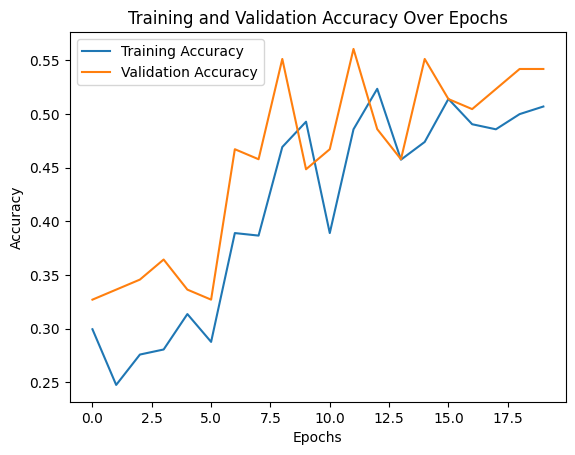

In [20]:
import matplotlib.pyplot as plt

# Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and
# validation accuracy - 2 curves)

# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
# Perform ONE of the following experiment below ((a), (b) or (c)) based on the last digit of your Rowan Banner ID
# BANNER ID: 916457651
#(a) Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer (i) with all
# other parameters unchanged
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Build the CNN model with 5x5 filter size
model_5x5 = Sequential()

# Convolutional Layer with 5x5 filter
model_5x5.add(Conv2D(8, (5, 5), activation='relu', input_shape=(100, 100, 1)))

# Max Pooling Layer with 2 × 2 pool size
model_5x5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the Tensor
model_5x5.add(Flatten())

# Hidden layer with 16 nodes for fully connected neural network
model_5x5.add(Dense(16, activation='relu'))

# Output layer with 4 nodes using 'softmax' activation function
model_5x5.add(Dense(4, activation='softmax'))

# Compile the model
model_5x5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_5x5.summary()

# Train the model for 20 epochs with a 20% validation split
history_5x5 = model_5x5.fit(x_train_reshaped, y_train_categorical,batch_size=150, epochs=20, validation_split=0.2)

# Evaluate the model on the test set
Score_5x5 = model_5x5.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print("Test loss 5x5:",Score_5x5[0])
print("Test accuracy 5x5:",Score_5x5[1])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 96, 96, 8)         208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 48, 48, 8)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 16)                294928    
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 295204 (1.13 MB)
Trainable params: 295204 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [22]:
# Build the CNN model with 7x7 filter size
model_7x7 = Sequential()

# Convolutional Layer with 7x7 filter
model_7x7.add(Conv2D(8, (7, 7), activation='relu', input_shape=(100, 100, 1)))

# Max Pooling Layer with 2 × 2 pool size
model_7x7.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the Tensor
model_7x7.add(Flatten())

# Hidden layer with 16 nodes for fully connected neural network
model_7x7.add(Dense(16, activation='relu'))

# Output layer with 4 nodes using 'softmax' activation function
model_7x7.add(Dense(4, activation='softmax'))

# Compile the model
model_7x7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_7x7.summary()

# Train the model for 20 epochs with a 20% validation split
history_7x7 = model_7x7.fit(x_train_reshaped, y_train_categorical,batch_size=150, epochs=20, validation_split=0.2)

# Evaluate the model on the test set
Score_7x7 = model_7x7.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print("Test loss 7x7:",Score_7x7[0])
print("Test accuracy 7x7:",Score_7x7[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 94, 94, 8)         400       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 47, 47, 8)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 17672)             0         
                                                                 
 dense_8 (Dense)             (None, 16)                282768    
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
Total params: 283236 (1.08 MB)
Trainable params: 283236 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

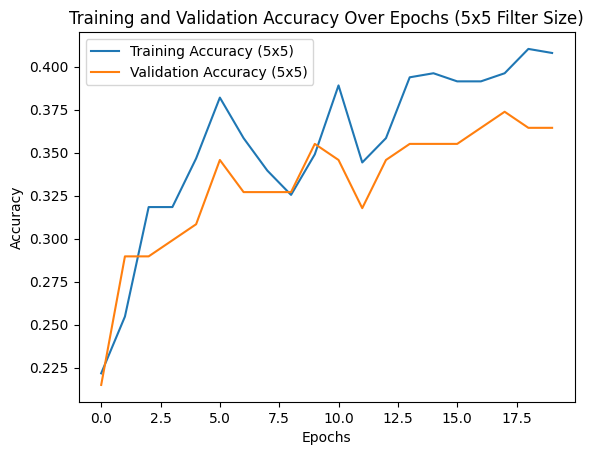

In [23]:
# Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy -
# 2 curves) for the classification models using the above 2 different parameter values
# Plot training and validation accuracy curves for 5x5 filter size
plt.plot(history_5x5.history['accuracy'], label='Training Accuracy (5x5)')
plt.plot(history_5x5.history['val_accuracy'], label='Validation Accuracy (5x5)')
plt.title('Training and Validation Accuracy Over Epochs (5x5 Filter Size)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


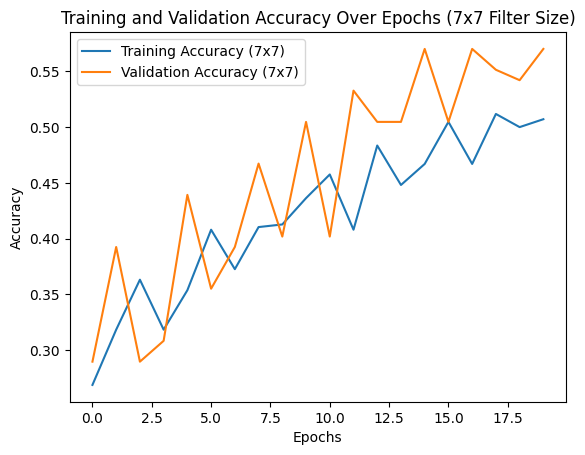

In [24]:

# Plot training and validation accuracy curves for 7x7 filter size
plt.plot(history_7x7.history['accuracy'], label='Training Accuracy (7x7)')
plt.plot(history_7x7.history['val_accuracy'], label='Validation Accuracy (7x7)')
plt.title('Training and Validation Accuracy Over Epochs (7x7 Filter Size)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Describe and discuss what you observe by comparing the performance of the first model and the
# other two models you constructed. Are theremodel overfit or underfit or just right?
'''
The first model which is 3x3 is an appropriate fit i.e. just right as there is no overfitting or underfitiing in the first model's training and validation accuracies curves.
Both 5x5 model and 7x7 model are also an appropriate fit as both curves in the 5x5 and 7x7 model increases and stabilizes. If the model are trained in higher number of epochs
the curves might stabilize more at similar level
'''